In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import dtale
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
%matplotlib inline

Data Cleaning
-

In [3]:
def convert_dtype(x):
    if not x:
        return ''
    try:
        return str(x)
    except:
        return ''
def convert_dtypea(x):
    if not x:
        return ''
    try:
        return int(x)
    except:
        return ''
    
smile = pd.read_csv('../data/Smileon.2021.10.17.csv', skiprows=2, header=0, encoding='latin-1', converters={
     'LinkedToCallReportNum':convert_dtype,'ThirdPartyStateProvince':convert_dtype, 'FeedbackFromPhoneWorkerName':convert_dtype,
'SMILE ON 60+ Demographic Information - # of People in Household':convert_dtypea, 'Birth Year':convert_dtypea, 'SMILE ON 60+ Oral Care Encounter - 2393 - Quantity':convert_dtypea,
'SMILE ON 60+ Oral Care Encounter - 2950 - Quantity':convert_dtypea, 'SMILE ON 60+ Oral Care Encounter - 4342 - Quantity':convert_dtypea,
'SMILE ON 60+ Oral Care Encounter - 7140 - Quantity':convert_dtypea, 'SMILE ON 60+ Oral Care Encounter - 7320 - Quantity':convert_dtypea,
'SMILE ON 60+ Oral Care Encounter - Lab Assist narrative':convert_dtype, 'SMILE ON 60+ Case Management Information - What is the outcome for the client?':convert_dtype,
'SMILE ON 60+ Case Management Information - Dental Clinic':convert_dtype})

In [4]:
df = smile

In [5]:
df = df.drop(columns = 'SMILE ON 60+ Base-line Oral and Conditions Questions - Dental Clinic')
df = df.drop(columns = 'SMILE ON 60+ Case Management Information - Dental Clinic')
df = df.drop(columns = 'SMILE ON 60+ Presumptive Eligibility - What is the next step for clients encounter?')
df = df.drop(columns = 'SMILE ON 60+ Oral Care Encounter - Was the enrollee able to be restored to function (can chew) and "social six" esthetics (top front six teeth are present and disease free)')

In [6]:
##used this for general data cleaning
df.columns = [x.replace('SMILE ON 60+ Demographic Information -','') for x in df.columns]
df.columns = [x.replace(' - Quantity','') for x in df.columns]
df.columns = [x.replace('SMILE ON 60+ Screening -','') for x in df.columns]
df.columns = [x.replace('SMILE ON 60+ Base-line Oral and Conditions Questions - ','') for x in df.columns]
df.columns = [x.replace('SMILE ON 60+ Case Management Information - ','') for x in df.columns]
df.columns = [x.replace('(Select all that apply)','') for x in df.columns]
df.columns = [x.replace('SMILE ON 60+ Case Management Information - ','') for x in df.columns]
df.columns = [x.replace('SMILE ON 60+ Demographic Information - ','') for x in df.columns]
df.columns = [x.replace('SMILE ON 60+ Screening -','') for x in df.columns]
df.columns = [x.replace('SMILE ON 60+ Clinic Information - ','') for x in df.columns]

In [7]:
df_clean = df.drop(columns = ['ReportVersion','LinkedToCallReportNum','CallDateAndTimeEnd','CallLength',
            'PhoneWorkerNum','WasRealCall','WasHangup','WasSexCall','WasWrongNumber',
            'WasPrankCall','WasSilentCall','GeoCode','GeoAssignment','CensusDivision','CensusTrack',
            'CensusReportingArea','211Region','PhoneType','ThirdPartyName','ThirdPartyOrganization',
            'ThirdPartyPhoneNumber','ThirdPartyAddress','ThirdPartyCity','ThirdPartyCounty',
            'ThirdPartyStateProvince','ThirdPartyPostalCode','Narrative','VolunteerComments',
            'Feedback','CallersFeedback','TextField2','TextField3','TextField4','TextField5',
            'TextField6','TextField7','TextField8','TextField9','TextField10','EnteredByWorkerNum',
            'EnteredOn','Supervisor','Reviewed','FeedbackStatus','FeedbackFromPhoneWorkerNum',
             'FeedbackFromPhoneWorkerName','ReferralsMade','IPAddress','OrgNum','VolIdentifier',
            'SMILE ON 60+ Verification of Eligibility - Verification Date',
            'Did the client commit to referral?','Did you help in these other areas?',
             'Transportation Barriers','Action: Upload Before Picture on Finish Tab','Was initial appointment made?',
            'Was initial transportation assistance or referral provided?',
            'SMILE ON 60+ Oral Care Encounter - Action: Upload After Picture on Finish Tab',
            'SMILE ON 60+ Presumptive Eligibility - Dental Insurance?','SMILE ON 60+ Presumptive Eligibility - Do they pre-qualify for SMILE ON 60+?',
            'SMILE ON 60+ Site Information - Enroller ID',
            'SMILE ON 60+ Site Information - Enroller Location',
            'SMILE ON 60+ Verification of Eligibility - Transportation Arranged','SMILE ON 60+ Verification of Eligibility - Verification of Eligibility',
            'SMILE ON 60+ Treatment Plan - Action: Upload After Picture on Finish Tab',' Root Fragments',' Need for Periodontal Care',' Suspicious Soft Tissue Lesions',
            ' Untreated Decay',' What other assistance programs are you on?',' Preferred Language/Language Needed',
            ' How did you first hear about the SMILE ON 60+ program?','SMILE ON 60+ Presumptive Eligibility - What is the next step for clients encounter? ',
            'What is the next step for clients encounter?'])

In [8]:
df_clean.columns = [x.replace('SMILE ON 60+ Oral Care Encounter -','') for x in df_clean.columns]
df_clean.columns = [x.replace('Was the enrollee able to be restored to function (can chew) and "social six" esthetics (top front six teeth are present and disease free)','social_6_restored') for x in df_clean.columns]
df_clean.columns = [x.replace('SMILE ON 60+ Presumptive Eligibility -','') for x in df_clean.columns]
df_clean.columns = [x.replace('What barriers have kept you from finding a consistent dental home?','barriers') for x in df_clean.columns]
df_clean.columns = [x.replace('How would you describe the condition of your mouth and teeth?','mouth_condition') for x in df_clean.columns]
df_clean.columns = [x.replace('Have you ever felt that the appearance of your mouth and teeth affected your quality of life?','teeth_affect_qualifty_of_life') for x in df_clean.columns]
df_clean.columns = [x.replace('No Code - ','') for x in df_clean.columns]
df_clean.columns = [x.replace('Experienced any problems related to mouth/teeth during past 12 months?','problems_past_year') for x in df_clean.columns]
df_clean.columns = [x.replace('How often do you brush your teeth?','brush_frequency') for x in df_clean.columns]

In [9]:
df_clean = df_clean[df_clean.CallerNum >= 0]

Subgroup the Data by Treatment Urgency Column. Merged to keep all records for patients labeled in any  3 subgroups at any point
-
Urgent Care - within next week-pain or infection

No obvious problem

Early care-within next several weeks


In [11]:
urgent = df_clean.loc[df_clean[' Treatment Urgency'] == 'Urgent Care - within next week-pain or infection']
urgent = urgent.filter(['CallReportNum','CallerNum'])

In [12]:
no_problem = df_clean.loc[df_clean[' Treatment Urgency'] == 'No obvious problem']
no_problem = no_problem.filter(['CallReportNum','CallerNum'])

In [13]:
early_care = df_clean.loc[df_clean[' Treatment Urgency'] == 'Early care-within next several weeks']
early_care = early_care.filter(['CallReportNum','CallerNum'])

In [14]:
urgent_merged = df_clean.merge(urgent,how='inner',on='CallerNum')

In [15]:
no_problem_merged = df_clean.merge(no_problem,how='inner',on='CallerNum')

In [16]:
early_care_merged = df_clean.merge(early_care,how='inner',on='CallerNum')

Create dummy variables for; was treatment plan develped,is treatment plan completed, was social 6 restored
-
use these to quantify number of completed treatment plans vs on-going treatment plans

In [18]:
created_dummy = pd.get_dummies(df_clean['SMILE ON 60+ Treatment Plan - Was a treatment plan developed?'])
created_dummy = created_dummy.rename(columns = {'No':'not_created','Yes':'created'}).astype(int)

In [19]:
completed_dummy = pd.get_dummies(df_clean['SMILE ON 60+ Treatment Plan - Is the treatment plan completed?'])
completed_dummy = completed_dummy.rename(columns = {'No':'not_completed','Yes':'completed'}).astype(int)

In [20]:
social_dummy = pd.get_dummies(df_clean['SMILE ON 60+ Treatment Plan - social_6_restored'])
social_dummy = social_dummy.rename(columns = {'No':'not_restored','Yes':'restored'}).astype(int)

In [21]:
df_clean = pd.concat([df_clean,created_dummy],axis=1)

In [23]:
df_clean = pd.concat([df_clean,completed_dummy],axis=1)

In [24]:
df_clean = pd.concat([df_clean,social_dummy],axis=1)

In [25]:
df_grouped = df_clean.groupby('CallerNum').agg('sum')

apply process to each of 3 subgroups
-

Urgent

In [28]:
urgent_created_dummy = pd.get_dummies(urgent_merged['SMILE ON 60+ Treatment Plan - Was a treatment plan developed?'])
urgent_created_dummy = urgent_created_dummy.rename(columns = {'No':'not_created','Yes':'created'}).astype(int)
urgent_completed_dummy = pd.get_dummies(urgent_merged['SMILE ON 60+ Treatment Plan - Is the treatment plan completed?'])
urgent_completed_dummy = urgent_completed_dummy.rename(columns = {'No':'not_completed','Yes':'completed'}).astype(int)
urgent_social_dummy = pd.get_dummies(urgent_merged['SMILE ON 60+ Treatment Plan - social_6_restored'])
urgent_social_dummy = urgent_social_dummy.rename(columns = {'No':'not_restored','Yes':'restored'}).astype(int)
urgent_merged = pd.concat([urgent_merged,urgent_created_dummy],axis=1)
urgent_merged = pd.concat([urgent_merged,urgent_completed_dummy],axis=1)
urgent_merged = pd.concat([urgent_merged,urgent_social_dummy],axis=1)

In [29]:
urgent_grouped = urgent_merged.groupby('CallerNum').agg('sum')

no problem

In [30]:
no_problem_created_dummy = pd.get_dummies(no_problem_merged['SMILE ON 60+ Treatment Plan - Was a treatment plan developed?'])
no_problem_created_dummy = no_problem_created_dummy.rename(columns = {'No':'not_created','Yes':'created'}).astype(int)
no_problem_completed_dummy = pd.get_dummies(no_problem_merged['SMILE ON 60+ Treatment Plan - Is the treatment plan completed?'])
no_problem_completed_dummy = no_problem_completed_dummy.rename(columns = {'No':'not_completed','Yes':'completed'}).astype(int)
no_problem_social_dummy = pd.get_dummies(no_problem_merged['SMILE ON 60+ Treatment Plan - social_6_restored'])
no_problem_social_dummy = no_problem_social_dummy.rename(columns = {'No':'not_restored','Yes':'restored'}).astype(int)
no_problem_merged = pd.concat([no_problem_merged,no_problem_created_dummy],axis=1)
no_problem_merged = pd.concat([no_problem_merged,no_problem_completed_dummy],axis=1)
no_problem_merged = pd.concat([no_problem_merged,no_problem_social_dummy],axis=1)

In [31]:
no_problem_grouped = no_problem_merged.groupby('CallerNum').agg('sum')

Early care

In [33]:
early_created_dummy = pd.get_dummies(early_care_merged['SMILE ON 60+ Treatment Plan - Was a treatment plan developed?'])
early_created_dummy = early_created_dummy.rename(columns = {'No':'not_created','Yes':'created'}).astype(int)
early_completed_dummy = pd.get_dummies(early_care_merged['SMILE ON 60+ Treatment Plan - Is the treatment plan completed?'])
early_completed_dummy = early_completed_dummy.rename(columns = {'No':'not_completed','Yes':'completed'}).astype(int)
early_social_dummy = pd.get_dummies(early_care_merged['SMILE ON 60+ Treatment Plan - social_6_restored'])
early_social_dummy = early_social_dummy.rename(columns = {'No':'not_restored','Yes':'restored'}).astype(int)
early_care_merged = pd.concat([early_care_merged,early_created_dummy],axis=1)
early_care_merged = pd.concat([early_care_merged,early_completed_dummy],axis=1)
early_care_merged = pd.concat([early_care_merged,early_social_dummy],axis=1)

In [34]:
early_care_grouped = early_care_merged.groupby('CallerNum').agg('sum')

Check for procedural differences between subgroups
-

urgent

In [35]:
urgent_sum = urgent_grouped.agg([sum])
urgent_sum = urgent_sum.iloc[:,3:62]
urgent_sumT = urgent_sum.T
urgent_sumT = urgent_sumT.loc[urgent_sumT['sum']>0]
urgent_sumT = urgent_sumT.sort_values(by='sum',ascending = False)
urgent_sumT = urgent_sumT.rename(columns={'sum':'Urgent_pct'})
urgent_sumT['Urgent_pct'] = (urgent_sumT['Urgent_pct']/urgent_sumT['Urgent_pct'].sum())*100

no problem

In [36]:
no_problem_sum = no_problem_grouped.agg([sum])
no_problem_sum = no_problem_sum.iloc[:,3:62]
no_problem_sumT = no_problem_sum.T
no_problem_sumT = no_problem_sumT.loc[no_problem_sumT['sum']>0]
no_problem_sumT = no_problem_sumT.sort_values(by='sum',ascending = False)
no_problem_sumT = no_problem_sumT.rename(columns={'sum':'no_problem_pct'})
no_problem_sumT['no_problem_pct'] = (no_problem_sumT['no_problem_pct']/no_problem_sumT['no_problem_pct'].sum())*100

early

In [37]:
early_care_sum = early_care_grouped.agg([sum])
early_care_sum = early_care_sum.iloc[:,3:62]
early_care_sumT = early_care_sum.T
early_care_sumT = early_care_sumT.loc[early_care_sumT['sum']>0]
early_care_sumT = early_care_sumT.sort_values(by='sum',ascending = False)
early_care_sumT = early_care_sumT.rename(columns={'sum':'early_pct'})
early_care_sumT['early_pct'] = (early_care_sumT['early_pct']/early_care_sumT['early_pct'].sum())*100

join data together

In [38]:
treatment_sum_joined = urgent_sumT.join([no_problem_sumT,early_care_sumT],how='outer')

In [39]:
treatment_joined_limit = treatment_sum_joined[:21]

what are the most prevalent procedures by subgroup
-

<AxesSubplot:>

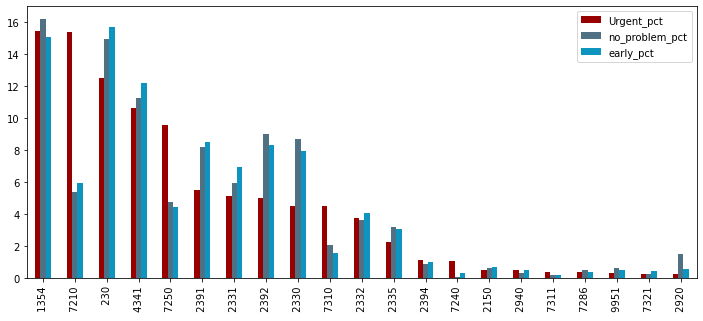

In [40]:
colors_list = ['#980000','#507184','#0D94BF']
treatment_joined_limit.plot.bar(color=colors_list,figsize = (12,5))

In [47]:
urgent_restored = urgent_merged.drop(['CallReportNum_x',
                                               'PostalCode',
                                               ' Is the treatment plan completed?',
                                               ' Was a treatment plan developed?',
                                               ' # of Lower Natural Teeth',
                                               ' # of Upper Natural Teeth',
                                               'CallReportNum_y',
                                               'not_created','created','not_completed','completed',
                                               'not_restored'],axis=1)

In [48]:
urgent_restored.head()

,CallDateAndTimeStart,CallerNum,CityName,CountyName,StateProvince,CountryName,# of People in Household,Birth Year,Other Language,SMILE ON 60+ Notes (Optional) - Notes,1351,1354,2140,2150,2160,2161,220,230,2330,2331,2332,2335,2390,2391,2392,2393,2394,2915,2920,2933,2940,2950,2954,2955,2980,3220,4341,4342,6930,6980,7111,7140,7210,7220,7230,7240,7241,7250,7261,7285,7286,7310,7311,7320,7321,7410,7411,7412,7413,7414,7415,7440,7450,7451,7460,7461,7471,7510,7511,7970 - Mandibular Quantity,7970 - Maxillary Quantity,7971,7972,9110,9951,Lab Assist narrative,Denture Step Mandibular Quantity,Denture Step Maxillary Quantity,Last Screening Date,Are you limited in what you can eat?,Do you need help in these other areas?,teeth_affect_qualifty_of_life,mouth_condition,What is the next step for client encounter?,barriers,What is the outcome for the client?,Is patient of record date if yes last seen?,Gender,Household Income Level,Race/Ethnicity,When is the last time you visited your dentist?,What care was provided to the enrollee?,Do you have removable dentures?,Do you usually wear your denture(s) when you eat?,problems_past_year,brush_frequency,Treatment Urgency,SMILE ON 60+ Treatment Plan - Is the treatment plan completed?,SMILE ON 60+ Treatment Plan - Was a treatment plan developed?,SMILE ON 60+ Treatment Plan - social_6_restored,restored
0,9/30/2021 15:03,4032888,Bristol,Sullivan,TN,United States,1,1948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,Yes,NaN,Yes,Poor,NaN,Dental cost; No insurance,,NaN,Female,$0 - $21 280,Caucasian,More than 5 years,7140 - Extraction - erupted tooth or exposed r...,NaN,NaN,NaN,NaN,NaN,No,Yes,NaN,0
1,9/30/2021 15:00,4032888,Bristol,Sullivan,TN,United States,1,1948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,Yes,NaN,Yes,Poor,NaN,Dental cost; No insurance,,NaN,Female,$0 - $21 280,Caucasian,More than 5 years,7140 - Extraction - erupted tooth or exposed r...,NaN,NaN,NaN,NaN,NaN,No,Yes,NaN,0
2,8/24/2021 15:51,4032888,Bristol,Sullivan,TN,United States,1,1948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,Yes,NaN,Yes,Poor,NaN,Dental cost; No insurance,,NaN,Female,$0 - $21 280,Caucasian,More than 5 years,7140 - Extraction - erupted tooth or exposed r...,NaN,NaN,NaN,NaN,NaN,No,Yes,NaN,0
3,5/21/2021 9:21,4032888,Bristol,Sullivan,TN,United States,1,1948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,Yes,NaN,Yes,Poor,NaN,Dental cost; No insurance,,NaN,Female,$0 - $21 280,Caucasian,More than 5 years,150 - Comprehensive Oral Evaluation -new or es...,No,No,Difficulty when biting or chewing foods; Felt ...,Once daily,Urgent Care - within next week-pain or infection,No,Yes,NaN,0
4,2/5/2021 10:28,4032888,Bristol,Sullivan,TN,United States,1,1948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,Yes,No,Yes,Poor,NaN,Dental cost; No insurance,,NaN,Female,$0 - $21 280,Caucasian,More than 5 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [46]:
d = dtale.show(urgent_restored)
d.open_browser()